In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale
from sklearn import model_selection 
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression 
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
import seaborn as sns
import random as rnd

In [2]:
data = pd.read_csv('Maize_2020.csv')

In [3]:
data[0:6]

,Unnamed: 0,crop,PlotID,year,trt,pheno,CHL,EWT,LWC,SLA,...,X2491,X2492,X2493,X2494,X2495,X2496,X2497,X2498,X2499,X2500
0,1269,maize,1001,2020,HN,yes,456.800,0.016142,0.728814,166.488281,...,0.076210,0.076144,0.075867,0.075773,0.075515,0.074958,0.074545,0.074182,0.073884,0.073802
1,1270,maize,1002,2020,HN,yes,268.475,0.015019,0.705036,159.146341,...,0.083926,0.083274,0.082861,0.082943,0.082536,0.081516,0.081260,0.081504,0.081208,0.081202
2,1271,maize,1003,2020,HN,yes,391.975,0.016189,0.767030,203.368421,...,0.062543,0.061958,0.061579,0.061323,0.061225,0.061467,0.061353,0.061195,0.061081,0.060759
3,1272,maize,1004,2020,HN,yes,488.650,0.016668,0.780142,212.887097,...,0.077193,0.076936,0.076582,0.076728,0.076516,0.075703,0.075252,0.074950,0.074795,0.074900
4,1273,maize,1005,2020,HN,yes,429.325,0.015147,0.719752,169.557196,...,0.070101,0.069837,0.069617,0.069944,0.069658,0.068802,0.068408,0.067899,0.067480,0.067600
5,1274,maize,1006,2020,HN,yes,388.900,0.011394,0.710443,215.344262,...,0.088581,0.088296,0.087942,0.087314,0.086973,0.086866,0.086534,0.086168,0.085974,0.085730


In [4]:
data = data[data.CHL.notnull()]

In [5]:
pd.value_counts(data.CHL, dropna=False)

428.700    2
427.025    2
471.550    2
486.675    2
445.250    2
          ..
296.675    1
495.100    1
460.100    1
404.650    1
401.250    1
Name: CHL, Length: 312, dtype: int64

In [6]:
col_filter = [col for col in data if col.startswith('X')]

In [7]:
X = data[col_filter]
y = data['CHL']

In [8]:
X.head()

,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,...,X2491,X2492,X2493,X2494,X2495,X2496,X2497,X2498,X2499,X2500
0,0.066393,0.041197,0.046172,0.070903,0.072898,0.076800,0.076229,0.077193,0.094269,0.097625,...,0.076210,0.076144,0.075867,0.075773,0.075515,0.074958,0.074545,0.074182,0.073884,0.073802
1,0.089343,0.047622,0.036665,0.063613,0.087790,0.076265,0.059558,0.060486,0.090054,0.090268,...,0.083926,0.083274,0.082861,0.082943,0.082536,0.081516,0.081260,0.081504,0.081208,0.081202
2,0.073535,0.035367,0.028720,0.058362,0.078162,0.076759,0.070137,0.072471,0.091935,0.087597,...,0.062543,0.061958,0.061579,0.061323,0.061225,0.061467,0.061353,0.061195,0.061081,0.060759
3,0.053849,0.013933,0.021878,0.062837,0.067202,0.072869,0.063967,0.053106,0.076691,0.067842,...,0.077193,0.076936,0.076582,0.076728,0.076516,0.075703,0.075252,0.074950,0.074795,0.074900
4,0.075200,0.047947,0.038910,0.054962,0.071838,0.075585,0.066497,0.063452,0.095525,0.099429,...,0.070101,0.069837,0.069617,0.069944,0.069658,0.068802,0.068408,0.067899,0.067480,0.067600


In [9]:
y.head()

0    456.800
1    268.475
2    391.975
3    488.650
4    429.325
Name: CHL, dtype: float64

In [10]:
pd.value_counts(data["CHL"], dropna= False)

428.700    2
427.025    2
471.550    2
486.675    2
445.250    2
          ..
296.675    1
495.100    1
460.100    1
404.650    1
401.250    1
Name: CHL, Length: 312, dtype: int64

In [11]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [12]:
len(X)

318

In [13]:
print(y)

0       456.800
1       268.475
2       391.975
3       488.650
4       429.325
         ...   
1636    402.950
1643    492.100
1645    475.525
1649    500.875
1655    401.250
Name: CHL, Length: 318, dtype: float64


In [14]:
print(X)

          X350      X351      X352      X353      X354      X355      X356  \
0     0.066393  0.041197  0.046172  0.070903  0.072898  0.076800  0.076229   
1     0.089343  0.047622  0.036665  0.063613  0.087790  0.076265  0.059558   
2     0.073535  0.035367  0.028720  0.058362  0.078162  0.076759  0.070137   
3     0.053849  0.013933  0.021878  0.062837  0.067202  0.072869  0.063967   
4     0.075200  0.047947  0.038910  0.054962  0.071838  0.075585  0.066497   
...        ...       ...       ...       ...       ...       ...       ...   
1636  0.086108  0.081353  0.069357  0.066578  0.101631  0.085885  0.060648   
1643  0.107635  0.088383  0.070858  0.075370  0.111884  0.094643  0.058673   
1645  0.115502  0.108385  0.094599  0.092437  0.127469  0.118700  0.088778   
1649  0.115839  0.081779  0.075903  0.100481  0.126021  0.114220  0.080029   
1655  0.097722  0.085333  0.080176  0.081388  0.087126  0.091395  0.068312   

          X357      X358      X359  ...     X2491     X2492    

<AxesSubplot:ylabel='Frequency'>

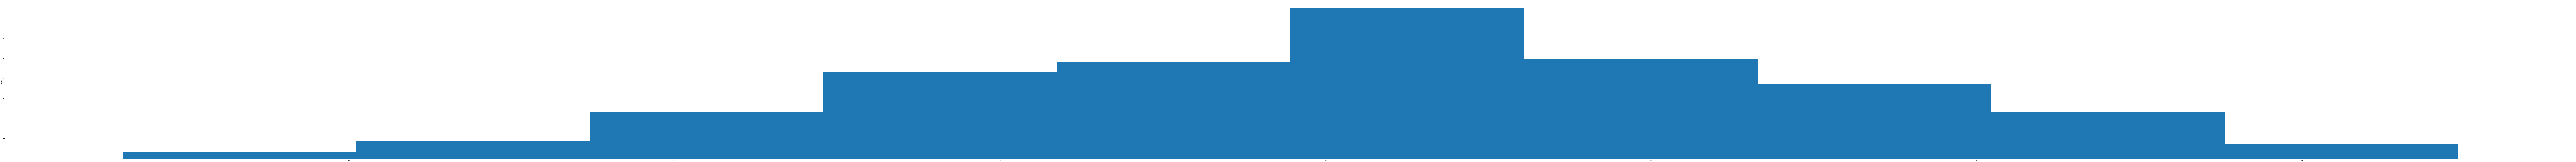

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize = (318, 20))
data['CHL'].plot(kind = "hist")

In [ ]:
plt.figure(figsize=(10, 10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
slope, intercept, r_value, p_value, std_err = linregress(X, y)
y_pred = intercept + slope * x

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
mse = []
n = len(X)

In [ ]:
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1), np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)
np.seterr(divide='ignore', invalid='ignore')

In [ ]:
for i in np.arange(1, 6): 
    pld = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv, 
               scorings='neg_mean_squared_error').mean()
    mse.append(score)
    
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('hp')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=0)

In [ ]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

np.sqrt(mean_squared_error(y_test, pls.perdict(scale(X_test))))